# Processing TESS sector 7 data for TOI4504

In [1]:
%matplotlib inline
from process_TESS_data.process_flux_data import *
path = '../research/star_systems/TOI-4504/lightkurve/'

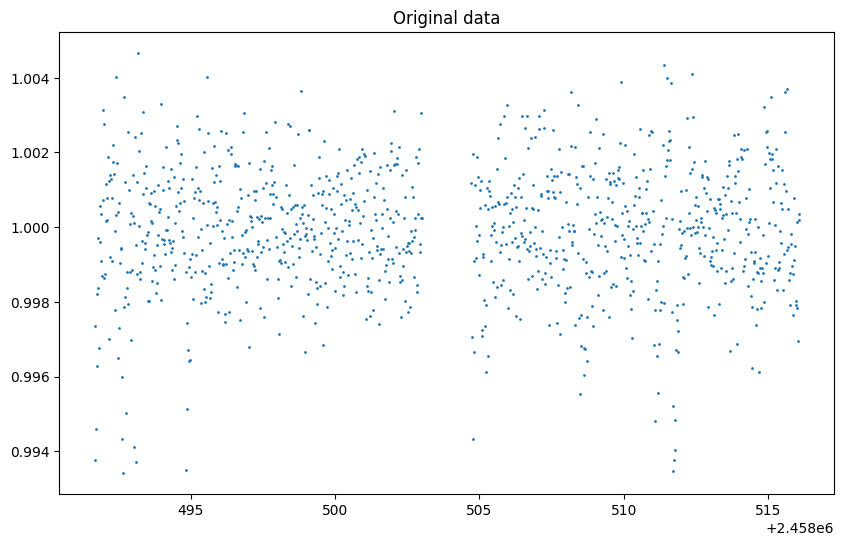

,time,flux,flux_err
0,2.458492e+06,0.993768,NaN
1,2.458492e+06,0.997343,NaN
2,2.458492e+06,0.994601,NaN
3,2.458492e+06,0.996287,NaN
4,2.458492e+06,0.998219,NaN
...,...,...,...
1080,2.458516e+06,0.997830,NaN
1081,2.458516e+06,1.000140,NaN
1082,2.458516e+06,0.996950,NaN
1083,2.458516e+06,1.000204,NaN


In [2]:
full_path = path+"7/7_TGLC_1800.csv"
df = csv2df(full_path)
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original data")
df

In [3]:
df = calculate_flux_err(df, window_length=101)
df

,time,flux,flux_err
0,2.458492e+06,0.993768,0.002445
1,2.458492e+06,0.997343,0.002427
2,2.458492e+06,0.994601,0.002477
3,2.458492e+06,0.996287,0.002454
4,2.458492e+06,0.998219,0.002435
...,...,...,...
1080,2.458516e+06,0.997830,0.001624
1081,2.458516e+06,1.000140,0.001605
1082,2.458516e+06,0.996950,0.001595
1083,2.458516e+06,1.000204,0.001606


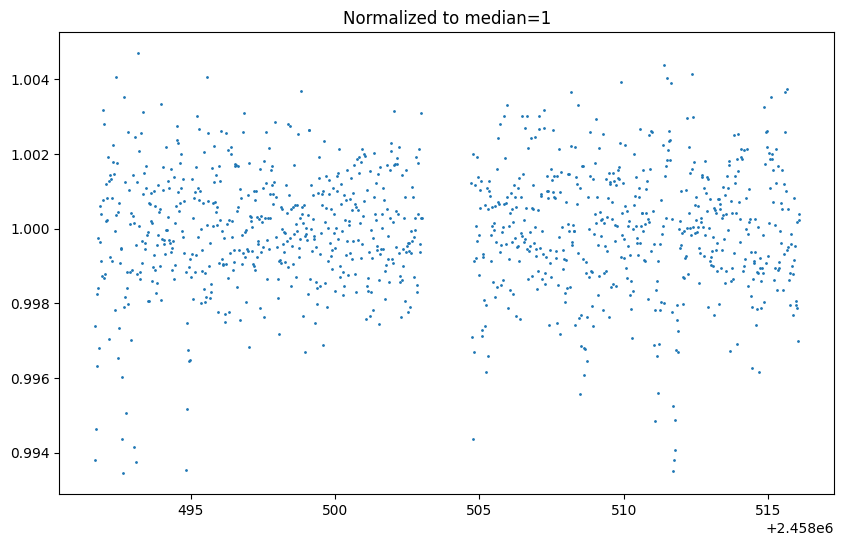

,time,flux,flux_err
0,2.458492e+06,0.993809,0.002445
1,2.458492e+06,0.997384,0.002427
2,2.458492e+06,0.994642,0.002477
3,2.458492e+06,0.996328,0.002454
4,2.458492e+06,0.998260,0.002435
...,...,...,...
1080,2.458516e+06,0.997871,0.001624
1081,2.458516e+06,1.000181,0.001605
1082,2.458516e+06,0.996991,0.001595
1083,2.458516e+06,1.000245,0.001606


In [4]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")
df

In [5]:
df2csv(df, full_path[:-4]+"_p.csv")